# Aproximación de funciones por polinomios reales
**Autor:** Martínez Torres Marcos Alfonso, Facultad de Ingeniería, UNAM

Licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Ejemplo

Aproximar $f(t)=\cos\left(\frac{\pi}{2}t\right)$ con un polinomio que coincida en $\{p_1,...,p_n\}$

### Solución
Se importan las bibliotecas de Python
* *numpy* : Permite crear y gestionar arreglos multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel que operan sobre estos arreglos. El sitio oficial es https://numpy.org/
* *matplotlib* : Permite crear visualizaciones estáticas, animadas e interactivas en 2D y 3D. El sitio oficial es https://matplotlib.org/
* *scipy* : Es una colección de herramientas y algoritmos matemáticos para Python. Esta librería proporciona funciones para realizar integración numérica, es decir, calcular el valor numérico de una integral definida. La función quad se utiliza específicamente para calcular la integral numérica de una función en un intervalo definido. El sitio oficial es https://scipy.org/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

**NOTA**: Para convocar las funciones de una biblioteca en el código, abreviamos dicha función con el nombre que queramos.
En este caso convocamos a *numpy* como np y la función *pyplot* de *matplotlib* como plt

Se construye el vector *numpy*  de la función   " *t* " que va a estar dentro del intervalo $p_1\leq t\leq p_n$, pidiendo al usuario los siguientes datos:
* El valor inferior del intervalo
* El valor superior del intervalo

In [ ]:
# Vector de numpy de la variable independiente pidiendo al usuario que ingrese el vector
p1 = float(input("Ingrese el valor inicial del vector: ")) #Valor inferior
pn = float(input("Ingrese el valor final del vector: ")) #Valor superior

#Vefiricar que el vector sea correcto
if p1 >= pn:
    print("Error: El límite inferior debe ser menor que el límite superior.")
else:
    print("Vector generado correctamente.")

# Crear el vector utilizando np.linspace()
t = np.linspace(p1, pn, 100)

# Mostrar el vector generado
#print("El vector generado es:", t)

**NOTA**: La función *np.linspace* de *numpy* es una herramienta útil para generar secuencias de números espaciados uniformemente dentro de un rango especificado.

Pedimos al usuario la cantidad de puntos que se quieren usar en la aproximación y validamos que esten en el intervalo de "*t*"

In [3]:
#Definir la cantidad de puntos a evaluar
n = int(input("Ingrese la cantidad de puntos a evaluar: "))

# Crear una lista para almacenar los puntos ingresados por el usuario
puntos = []

# Pedir al usuario que ingrese los puntos a evaluar
for i in range(n):
    punto = float(input(f"Ingrese el punto {i + 1}: "))
    # Verificar que el punto esté dentro del intervalo de t
    if p1 <= punto <= pn:
        puntos.append(punto)
    else:
        print(f"Error: El punto {punto} está fuera del intervalo [{p1}, {pn}].")

Se construye la función original

In [4]:
# Vector de numpy con la evaluación de la función que se quiere aproximar
f = np.cos(np.pi/2*t)

**NOTA**: " *np.cos* " es la función coseno incluida en *numpy*, por que python base no la contiene, lo mismo pasa con " *np.pi* "

Graficamos la funcion original

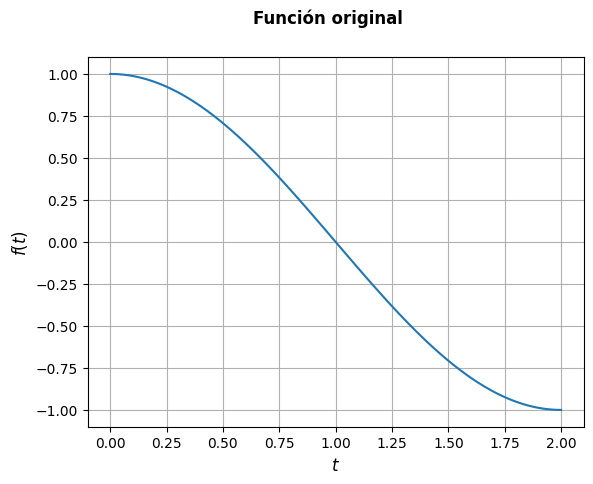

In [5]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función con respecto al vector de la variable independiente
plt.plot(t, f)

# Se edita la figura
plt.xlabel('$t$',fontsize=12) # Se escribe la etiqueta del eje de la variable indpendiente en tamaño de letra 12
plt.ylabel('$f(t)$',fontsize=12) # Se escribe la etiqueta del eje de la función en tamaño de letra 12
plt.suptitle('Función original', weight='bold') # Se escribe el título de la gráfica 
plt.grid() # Se grafica la cuadrícula

# Se muestra la figura
plt.show()

Aproximaremos la función original con **n puntos** que esten dentro del intervalo de  $p_1\leq t\leq p_n$ , para ello necesitaremos trabajar con un **polinomió de orden n-1**  
$$
f_a(t)=\sum_{k=0}^{n-1} a_kt^k=a_0+a_1t+a_2t^2+a_3t^3+...+a_{n-1}t^{n-1}
$$
para poder construir un **sistema algebraico cuadrado** que se pueda resolverse.<br><br>
**NOTA**: *Si se eligiera un polinomio de menor orden, se tendría un sistema algebraico sobredeterminado. Por el contrario, si se eligiera un polinomio de orden mayor, se tendría un sistema algebraico subdeterminado.*<br><br>
El sistema matricial se construye al evaluar la *función original* en los puntos solicitados $\{p_1,p_2,\ldots,p_n\}$ ,  y hacerlos **coincidir** con la evaluación de la *función aproximada*

$$
\begin{align}
\cos\left(\frac{\pi}{2}p_1\right) && = && f_a(p_1) && = && a_0 &&+&& a_1 &&+&& a_2 &&+&&...&&+&& a_{n-1}\\
\vdots \\
\cos\left(\frac{\pi}{2}p_n\right) && = && f_a(p_n) && = && a_0 &&+&& a_1 &&+&& a_2 &&+&&...&&+&& a_{n-1}
\end{align}
$$

Evaluamos

In [6]:
# Evaluar la función en los puntos ingresados por el usuario
rhs = np.cos((np.pi / 2) * np.array(puntos))#El vector independiente

# Mostrar los resultados
print(rhs)

[ 1.000000e+00  6.123234e-17 -1.000000e+00]


In [7]:
#Creamos la matriz que esta en funcion de los puntos y del orden del polinomio
M = np.vander(puntos, n, increasing=True)

#Imprime la matriz
print(M)

[[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]]


**NOTA**
* *np.vander* : crea una matriz de Vandermonde, el parámetro *increasing=True* indica que los exponentes de los términos del polinomio aumentan de izquierda a derecha en cada fila de la matriz.

Resolvemos el sistema matricial para encontrar los coeficientes de la función aproximada con las siguientes funciones de **numpy**<br>
* *matmul* : Regresa el producto de dos arreglos de numpy
* *linalg.inv* : Calcula la inversa de un arreglo bidimensional de numpy
* *transpose* : Regresa el transpuesto de un arreglo de numpy

In [8]:
coef = np.matmul(np.linalg.inv(M),np.transpose(rhs))
coef

array([ 1.00000000e+00, -1.00000000e+00, -5.55111512e-17])

La función " *polyval* " en *numpy* se utiliza para evaluar un polinomio dado en un punto específico o en una serie de puntos.<br>
**NOTA**: Se requiere invertir el orden del vector con los coeficientes con *flipud* porque la función *polyval* requiere que esten ordenados del grado mayor a la constante.

In [9]:
fa = np.polyval(np.flipud(coef),t)

Graficamos la función aproximada y la original para poder compararlas

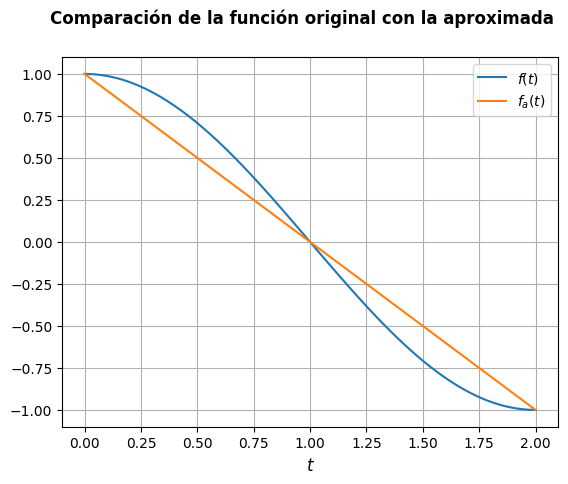

In [10]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función original con respecto al vector de la variable independiente
plt.plot(t, f, label='$f(t)$')

# Se grafica el vector de la función aproximada con respecto al vector de la variable independiente
plt.plot(t, fa, label='$f_a(t)$')

# Se edita la figura
plt.xlabel('$t$', fontsize=12)  # Se escribe la etiqueta del eje de la variable independiente en tamaño de letra 12
plt.suptitle('Comparación de la función original con la aproximada', weight='bold')  # Se escribe el título de la gráfica
plt.grid()  # Se grafica la cuadrícula
plt.legend()  # Se imprime la leyenda

# Mostrar la gráfica
plt.show()

Para el calculo de la función error, se define como $\epsilon = f(t) - f_a(t)$<br>
<br>
De otra forma la funcion de error porcentual esta definida por: <br><br>
$$\text{Error porcentual} = \left( \frac{f(t) - f_a(t)}{f(t)} \right) \times 100
$$

In [11]:
# Calcular el error en cada punto
error = f - fa

# Calcular el error porcentual de cada punto
error_porcentual = (error/f)*100

# Mostrar el error en cada punto
print("Error en cada punto:", error)

#Mostrar el error porcentual por cada punto
#print("Error porcentual:", error_porcentual)

Error en cada punto: [ 0.00000000e+00  1.96985626e-02  3.83907169e-02  5.60779832e-02
  7.27628936e-02  8.84489897e-02  1.03140818e-01  1.16843928e-01
  1.29564863e-01  1.41311155e-01  1.52091320e-01  1.61914843e-01
  1.70792175e-01  1.78734720e-01  1.85754821e-01  1.91865752e-01
  1.97081700e-01  2.01417757e-01  2.04889896e-01  2.07514965e-01
  2.09310662e-01  2.10295519e-01  2.10488888e-01  2.09910914e-01
  2.08582523e-01  2.06525393e-01  2.03761937e-01  2.00315279e-01
  1.96209233e-01  1.91468273e-01  1.86117516e-01  1.80182690e-01
  1.73690114e-01  1.66666667e-01  1.59139762e-01  1.51137320e-01
  1.42687740e-01  1.33819873e-01  1.24562989e-01  1.14946751e-01
  1.05001183e-01  9.47566420e-02  8.42437840e-02  7.34935368e-02
  6.25370666e-02  5.14057474e-02  4.01311292e-02  2.87449064e-02
  1.72788855e-02  5.76495373e-03 -5.76495373e-03 -1.72788855e-02
 -2.87449064e-02 -4.01311292e-02 -5.14057474e-02 -6.25370666e-02
 -7.34935368e-02 -8.42437840e-02 -9.47566420e-02 -1.05001183e-01
 -1.

Gráfica de la función error.

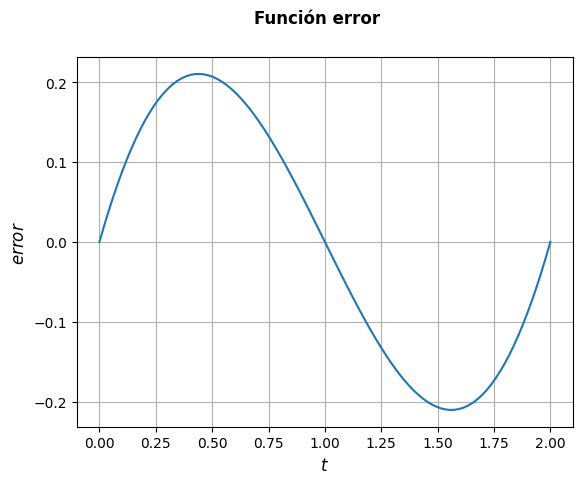

In [12]:
# Se crea la figura
fig = plt.figure()

# Se grafica el vector de la función con respecto al vector de la variable independiente
plt.plot(t, error)

# Se edita la figura
plt.xlabel('$t$',fontsize=12) # Se escribe la etiqueta del eje de la variable indpendiente en tamaño de letra 12
plt.ylabel('$error$',fontsize=12) # Se escribe la etiqueta del eje de la función en tamaño de letra 12
plt.suptitle('Función error', weight='bold') # Se escribe el título de la gráfica 
plt.grid() # Se grafica la cuadrícula

# Se muestra la figura
plt.show()

De este método podemos observar que:
* Al aumentar los puntos en comun, aumenta el grado del polinomio y se obtiene una mejor aproximación, pero tambien aumenta el tamaño del sistema de ecuaciones a resolver
* El calculo del error se realiza punto por punto

Obteniendo el error promedio se evalúa la calidad de la aproximación en todos los puntos dentro de un rango, en las notas de Anguiano se define el error promedio como:<br>
$$\epsilon_0=\frac{1}{p_n - p_1} \int_{p_1}^{p_n} \underbrace{(f(t) - f_a(t))}_{\text{error}} \, dt$$

In [13]:
# Calcular la integral
integral, _ = quad(lambda x: np.interp(x, t, f) - np.interp(x, t, fa), p1, pn)

# Calcular el término (1/(pn - p1))
constante = 1 / (pn - p1)

# Calcular el valor del error promedio
error_promedio = constante * integral

# Mostrar el resultado
print("Error promedio:", error_promedio)

Error promedio: -1.079416903828047e-16


Algunos detalles sobre el código de la integral son los siguientes:<br>
* La función **quad** calcula la integral de una función dada entre dos límites dados. 
* Dentro de la función **np.interp(x, t, f)** interpola la función original $f(t)$ en el punto *x*, lo mismo pasa con la función aproximada $f_a(t)$

Otra forma de calcular el error promedio en python es haciendo uso de funciones incluidas en *Numpy*.<br>
* *np.abs* : Calcula el valor absoluto del elemeto deseado, en este caso del arreglo llamdo "*error*".
* *np.mean* : Proporciona la media de un arreglo. 

In [14]:
# Calcular el error absoluto en cada punto
error_abs = np.abs(error)

# Calcular el error promedio
error_p = np.mean(error_abs)

# Mostrar el error promedio
print("Error promedio:", error_p)

Error promedio: 0.13522951475272044
